In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from scipy.ndimage.interpolation import shift
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, classification_report
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier



mnist = fetch_openml('mnist_784', version=1)
df = pd.DataFrame(mnist.data)
df['target'] = mnist.target.astype(int)

X, y = mnist["data"], mnist["target"].astype(int)
test_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in test_split.split(df, df["target"]):
    X_train, y_train = X.loc[train_index], y.loc[train_index]
    X_test, y_test = X.loc[test_index], y.loc[test_index]

# print(y_train.value_counts().sort_index() / len(X_train))
# print(y_test.value_counts().sort_index() / len(X_test))

C:\Users\Windows\AppData\Local\Temp\ipykernel_6560\399802458.py:7: DeprecationWarning: Please import `shift` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.interpolation import shift


In [2]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train.astype(np.float32))
X_test = scaler.transform(X_test.astype(np.float32))

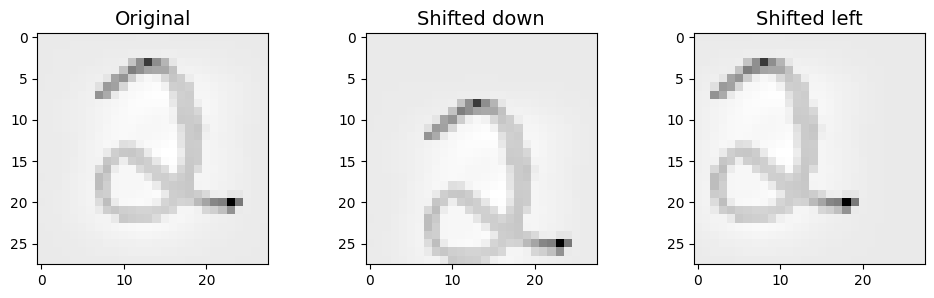

In [3]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

image = X_train[1000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [4]:
print(X_train.shape)

X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

print(X_train_augmented.shape)

(56000, 784)
(280000, 784)


In [5]:
# # Test F1: 0.9075714111060671
# sgd_clf = SGDClassifier(random_state=42)

# # param_grid = {
# #     'loss': ['hinge', 'log_loss', 'modified_huber'],
# #     'alpha': [0.0001, 0.001, 0.01],
# #     'penalty': ['l2', 'l1', 'elasticnet']
# # }

# param_grid = {
#     'loss': ['modified_huber'],
#     'alpha': [0.001],
#     'penalty': ['elasticnet']
# }

# grid_search = GridSearchCV(sgd_clf, param_grid, scoring='f1_weighted', cv=3, verbose=3, n_jobs=-1, error_score='raise')
# grid_search.fit(X_train, y_train)

# print(grid_search.best_params_)
# print(grid_search.best_estimator_)

# cvres = grid_search.cv_results_
# for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#     print(mean_score, params)

# y_pred = grid_search.predict(X_test)
# precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')
# classification_rep = classification_report(y_test, y_pred)

# print(f"Test Precision: {precision}")
# print(f"Test Recall: {recall}")
# print(f"Test F1: {f1}")
# print(classification_rep)

# conf_mx = confusion_matrix(y_test, y_pred)
# print(conf_mx)

# row_sums = conf_mx.sum(axis=1, keepdims=True)
# norm_conf_mx = conf_mx / row_sums
# np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
# plt.show()

In [6]:
# # Test F1: 0.9081725956963117
# sgd_clf = SGDClassifier(loss='modified_huber', alpha=0.001, penalty='elasticnet', random_state=42)
# sgd_clf.fit(X_train_augmented, y_train_augmented)

# y_pred = sgd_clf.predict(X_test)
# precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')
# classification_rep = classification_report(y_test, y_pred)

# print(f"Test Precision: {precision}")
# print(f"Test Recall: {recall}")
# print(f"Test F1: {f1}")
# print(classification_rep)

# conf_mx = confusion_matrix(y_test, y_pred)
# print(conf_mx)

# row_sums = conf_mx.sum(axis=1, keepdims=True)
# norm_conf_mx = conf_mx / row_sums
# np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
# plt.show()

In [7]:
# # Test F1: 0.9193990824119003
# log_reg = LogisticRegression(random_state=42)

# param_grid = {
#     'tol': [1e-4, 1e-3, 1e-2],
#     'C': [0.1, 1.0, 10.0],
#     'penalty': ['l2']
# }

# # param_grid = {
# #     'loss': ['modified_huber'],
# #     'alpha': [0.001],
# #     'penalty': ['elasticnet']
# # }

# grid_search = GridSearchCV(log_reg, param_grid, scoring='f1_weighted', cv=3, verbose=3, n_jobs=-1, error_score='raise')
# grid_search.fit(X_train, y_train)

# print(grid_search.best_params_)
# print(grid_search.best_estimator_)

# cvres = grid_search.cv_results_
# for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#     print(mean_score, params)

# y_pred = grid_search.predict(X_test)
# precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')
# classification_rep = classification_report(y_test, y_pred)

# print(f"Test Precision: {precision}")
# print(f"Test Recall: {recall}")
# print(f"Test F1: {f1}")
# print(classification_rep)

# conf_mx = confusion_matrix(y_test, y_pred)
# print(conf_mx)

# row_sums = conf_mx.sum(axis=1, keepdims=True)
# norm_conf_mx = conf_mx / row_sums
# np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
# plt.show()

In [8]:
# # Test F1: 0.9203339405640859
# log_reg = LogisticRegression(C=0.1, penalty='l2', tol=0.001, random_state=42)
# log_reg.fit(X_train_augmented, y_train_augmented)

# y_pred = log_reg.predict(X_test)
# precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')
# classification_rep = classification_report(y_test, y_pred)

# print(f"Test Precision: {precision}")
# print(f"Test Recall: {recall}")
# print(f"Test F1: {f1}")
# print(classification_rep)

# conf_mx = confusion_matrix(y_test, y_pred)
# print(conf_mx)

# row_sums = conf_mx.sum(axis=1, keepdims=True)
# norm_conf_mx = conf_mx / row_sums
# np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
# plt.show()

In [9]:
# # Test F1: 0.9596088129203187
# knn = KNeighborsClassifier()

# # param_grid = {
# #     'n_neighbors': [3, 5, 7, 9, 11],
# #     'metric': ['euclidean', 'manhattan']
# # }

# param_grid = {
#     'n_neighbors': [3],
#     'metric': ['manhattan']
# }

# grid_search = GridSearchCV(knn, param_grid, scoring='f1_weighted', cv=3, verbose=3, error_score='raise')
# grid_search.fit(X_train, y_train)

# print(grid_search.best_params_)
# print(grid_search.best_estimator_)

# cvres = grid_search.cv_results_
# for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#     print(mean_score, params)

# y_pred = grid_search.predict(X_test)
# precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')
# classification_rep = classification_report(y_test, y_pred)

# print(f"Test Precision: {precision}")
# print(f"Test Recall: {recall}")
# print(f"Test F1: {f1}")
# print(classification_rep)

# conf_mx = confusion_matrix(y_test, y_pred)
# print(conf_mx)

# row_sums = conf_mx.sum(axis=1, keepdims=True)
# norm_conf_mx = conf_mx / row_sums
# np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
# plt.show()

In [10]:
# # Test F1: 0.9632682153813272 
# knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
# knn.fit(X_train_augmented, y_train_augmented)

# y_pred = knn.predict(X_test)
# precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')
# classification_rep = classification_report(y_test, y_pred)

# print(f"Test Precision: {precision}")
# print(f"Test Recall: {recall}")
# print(f"Test F1: {f1}")
# print(classification_rep)

# conf_mx = confusion_matrix(y_test, y_pred)
# print(conf_mx)

# row_sums = conf_mx.sum(axis=1, keepdims=True)
# norm_conf_mx = conf_mx / row_sums
# np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
# plt.show()

In [11]:
# # Test F1: 0.9780048580882497
# svm = SVC()

# # param_grid = {
# #     'kernel': ['linear', 'rbf', 'poly'],
# #     'C': [0.1, 1, 10]
# # }

# param_grid = {
#     'C': [10], 
#     'kernel': ['poly']
# }

# grid_search = GridSearchCV(svm, param_grid, scoring='f1_weighted', cv=3, verbose=3, error_score='raise')
# grid_search.fit(X_train, y_train)

# print(grid_search.best_params_)
# print(grid_search.best_estimator_)

# cvres = grid_search.cv_results_
# for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#     print(mean_score, params)

# y_pred = grid_search.predict(X_test)
# precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')
# classification_rep = classification_report(y_test, y_pred)

# print(f"Test Precision: {precision}")
# print(f"Test Recall: {recall}")
# print(f"Test F1: {f1}")
# print(classification_rep)

# conf_mx = confusion_matrix(y_test, y_pred)
# print(conf_mx)

# row_sums = conf_mx.sum(axis=1, keepdims=True)
# norm_conf_mx = conf_mx / row_sums
# np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
# plt.show()

In [12]:
# # Test F1: 0.9827832571382139
# svc = SVC(C=10, kernel='poly')
# svc.fit(X_train_augmented, y_train_augmented)

# y_pred = svc.predict(X_test)
# precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')
# classification_rep = classification_report(y_test, y_pred)

# print(f"Test Precision: {precision}")
# print(f"Test Recall: {recall}")
# print(f"Test F1: {f1}")
# print(classification_rep)

# conf_mx = confusion_matrix(y_test, y_pred)
# print(conf_mx)

# row_sums = conf_mx.sum(axis=1, keepdims=True)
# norm_conf_mx = conf_mx / row_sums
# np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
# plt.show()

In [13]:
# # Test F1: 0.4811489021681455

# nb = GaussianNB()

# # param_grid = {
# #     'kernel': ['linear', 'rbf', 'poly'],
# #     'C': [0.1, 1, 10]
# # }

# param_grid = {
# }

# grid_search = GridSearchCV(nb, param_grid, scoring='f1_weighted', cv=3, verbose=3, error_score='raise')
# grid_search.fit(X_train, y_train)

# print(grid_search.best_params_)
# print(grid_search.best_estimator_)

# cvres = grid_search.cv_results_
# for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#     print(mean_score, params)

# y_pred = grid_search.predict(X_test)
# precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')
# classification_rep = classification_report(y_test, y_pred)

# print(f"Test Precision: {precision}")
# print(f"Test Recall: {recall}")
# print(f"Test F1: {f1}")
# print(classification_rep)

# conf_mx = confusion_matrix(y_test, y_pred)
# print(conf_mx)

# row_sums = conf_mx.sum(axis=1, keepdims=True)
# norm_conf_mx = conf_mx / row_sums
# np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
# plt.show()

In [14]:
# # Test F1: 0.8765294963017509

# clf = DecisionTreeClassifier(random_state=42)

# # param_grid = {
# #     'kernel': ['linear', 'rbf', 'poly'],
# #     'C': [0.1, 1, 10]
# # }

# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'splitter': ['best', 'random'],
#     'max_depth': [10, 20, 30, None],
#     'min_samples_split': [2, 5, 10],
# }

# grid_search = GridSearchCV(clf, param_grid, scoring='f1_weighted', cv=3, verbose=3, error_score='raise')
# grid_search.fit(X_train, y_train)

# print(grid_search.best_params_)
# print(grid_search.best_estimator_)

# cvres = grid_search.cv_results_
# for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#     print(mean_score, params)

# y_pred = grid_search.predict(X_test)
# precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')
# classification_rep = classification_report(y_test, y_pred)

# print(f"Test Precision: {precision}")
# print(f"Test Recall: {recall}")
# print(f"Test F1: {f1}")
# print(classification_rep)

# conf_mx = confusion_matrix(y_test, y_pred)
# print(conf_mx)

# row_sums = conf_mx.sum(axis=1, keepdims=True)
# norm_conf_mx = conf_mx / row_sums
# np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
# plt.show()

In [15]:
# # Test F1: 0.9681956897309666

# clf = RandomForestClassifier(random_state=42)

# param_grid = {
#     'max_depth': [None],
#     'min_samples_split': [2], 
#     'n_estimators': [300]
# }

# # param_grid = {
# #     'n_estimators': [50, 100, 200],
# #     'max_depth': [10, 20, 30, None],
# #     'min_samples_split': [2, 5, 10],
# # }

# grid_search = GridSearchCV(clf, param_grid, scoring='f1_weighted', cv=3, verbose=3, error_score='raise')
# grid_search.fit(X_train, y_train)

# print(grid_search.best_params_)
# print(grid_search.best_estimator_)

# cvres = grid_search.cv_results_
# for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#     print(mean_score, params)

# y_pred = grid_search.predict(X_test)
# precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')
# classification_rep = classification_report(y_test, y_pred)

# print(f"Test Precision: {precision}")
# print(f"Test Recall: {recall}")
# print(f"Test F1: {f1}")
# print(classification_rep)

# conf_mx = confusion_matrix(y_test, y_pred)
# print(conf_mx)

# row_sums = conf_mx.sum(axis=1, keepdims=True)
# norm_conf_mx = conf_mx / row_sums
# np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
# plt.show()

In [16]:
# # Test F1: 0.9754268953754945
# clf = RandomForestClassifier(n_estimators=300, max_depth=None, min_samples_split=2, random_state=42)
# clf.fit(X_train_augmented, y_train_augmented)

# y_pred = clf.predict(X_test)
# precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')
# classification_rep = classification_report(y_test, y_pred)

# print(f"Test Precision: {precision}")
# print(f"Test Recall: {recall}")
# print(f"Test F1: {f1}")
# print(classification_rep)

# conf_mx = confusion_matrix(y_test, y_pred)
# print(conf_mx)

# row_sums = conf_mx.sum(axis=1, keepdims=True)
# norm_conf_mx = conf_mx / row_sums
# np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
# plt.show()

Test Precision: 0.9326430742736809
Test Recall: 0.9323571428571429
Test F1: 0.9323751844042452
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1381
           1       0.97      0.97      0.97      1575
           2       0.93      0.93      0.93      1398
           3       0.93      0.91      0.92      1428
           4       0.94      0.92      0.93      1365
           5       0.95      0.92      0.93      1263
           6       0.95      0.95      0.95      1375
           7       0.94      0.94      0.94      1459
           8       0.90      0.90      0.90      1365
           9       0.87      0.91      0.89      1391

    accuracy                           0.93     14000
   macro avg       0.93      0.93      0.93     14000
weighted avg       0.93      0.93      0.93     14000

[[1353    0    0    0    1    0    2    1   22    2]
 [   1 1529    9   14    1    2    4    6    6    3]
 [  15    2 1300    9   10    0   11   2

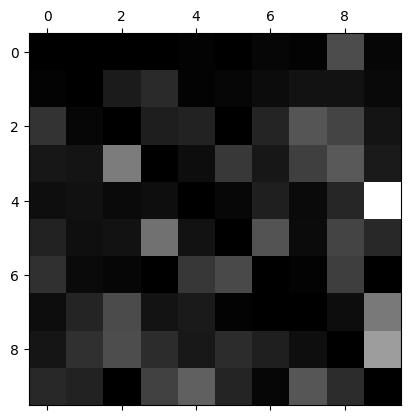

In [ ]:
# # Test F1: 0.9323751844042452
# clf = HistGradientBoostingClassifier(learning_rate=0.01, max_depth=None, min_samples_leaf=20)  
# clf.fit(X_train_augmented, y_train_augmented)

# y_pred = clf.predict(X_test)
# precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')
# classification_rep = classification_report(y_test, y_pred)

# print(f"Test Precision: {precision}")
# print(f"Test Recall: {recall}")
# print(f"Test F1: {f1}")
# print(classification_rep)

# conf_mx = confusion_matrix(y_test, y_pred)
# print(conf_mx)

# row_sums = conf_mx.sum(axis=1, keepdims=True)
# norm_conf_mx = conf_mx / row_sums
# np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
# plt.show()

# Best Model:

## SVC(C=10, kernel='poly')
### Test F1: 0.9827832571382139